# EX3: Some Statistics with Baby Names

### Introduction:

We are going to use a subset of [US Baby Names](https://www.kaggle.com/kaggle/us-baby-names) from Kaggle.  
In the file it will be names from 2004 until 2014


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. 
User ***Jupyter Lab*** to view ``../../DATA/US_Baby_Names_right.csv'``.

### Step 3. Assign it to a variable called baby_names.

In [8]:
baby_names=pd.read_csv('../../DATA/US_Baby_Names_right.csv')

### Step 4. See the first 10 entries

In [9]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### Step 5. Delete the column 'Unnamed: 0' and 'Id'

In [10]:
baby_names = baby_names.drop(['Unnamed: 0', 'Id'], axis=1)

In [11]:
baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


In [57]:
baby_names[baby_names['Name'] == 'Emma']

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
205,Emma,2005,F,AK,49
418,Emma,2006,F,AK,49
644,Emma,2007,F,AK,41
838,Emma,2008,F,AK,51
...,...,...,...,...,...
1013854,Emma,2010,F,WY,23
1013983,Emma,2011,F,WY,43
1014104,Emma,2012,F,WY,40
1014222,Emma,2013,F,WY,30


### Step 6. Are there more male or female names in the dataset?

In [12]:
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

### Step 7. Group the dataset by name and assign to names

In [44]:
names = baby_names.groupby('Name')

### Step 8. How many different names exist in the dataset?

In [45]:
len(names.count())

17632

### Step 9. What is the name with most occurrences?

In [69]:
names['Count'].count().sort_values()[-1:]

Name
Riley    1112
Name: Count, dtype: int64

### Step 10. How many different names have the least occurrences?

In [107]:
count = names['Count'].count()
len(count.loc[count == count.min()])

3682

### Step 11. What is the median name occurrence?

Name
Aaban       6.0
Aadan       5.5
Aadarsh     5.0
Aaden      10.0
Aadhav      6.0
           ... 
Zyra        6.0
Zyrah       5.5
Zyren       6.0
Zyria       6.0
Zyriah      6.0
Name: Count, Length: 17632, dtype: float64

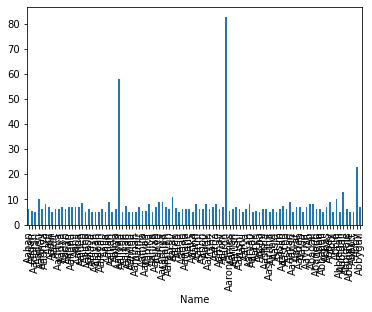

In [108]:
names['Count'].median()[:100].plot.bar()
names['Count'].median()

### Step 12. What is the standard deviation of names?

In [71]:
names['Count'].std()

Name
Aaban       0.000000
Aadan       0.957427
Aadarsh          NaN
Aaden      21.154974
Aadhav           NaN
             ...    
Zyra        1.154701
Zyrah       0.707107
Zyren            NaN
Zyria       0.737865
Zyriah      1.666667
Name: Count, Length: 17632, dtype: float64

### Step 13. Get a summary with the mean, min, max, std and quartiles.

In [93]:
def quartiles(n):
    def quartiles_(x):
        return x.quantile(n)
    quartiles_.__name__ = 'quartiles_%s' % n
    return quartiles_

In [94]:
names.agg(['mean', 'min', 'max', 'std', quartiles(0.25), quartiles(0.5), quartiles(0.75)])

Year                                                     \
                mean   min   max       std quartiles_0.25 quartiles_0.5   
Name                                                                      
Aaban    2013.500000  2013  2014  0.707107        2013.25        2013.5   
Aadan    2009.750000  2008  2014  2.872281        2008.00        2008.5   
Aadarsh  2009.000000  2009  2009       NaN        2009.00        2009.0   
Aaden    2010.015306  2005  2014  2.044322        2008.00        2010.0   
Aadhav   2014.000000  2014  2014       NaN        2014.00        2014.0   
...              ...   ...   ...       ...            ...           ...   
Zyra     2012.142857  2008  2014  2.115701        2011.50        2013.0   
Zyrah    2012.000000  2011  2013  1.414214        2011.50        2012.0   
Zyren    2013.000000  2013  2013       NaN        2013.00        2013.0   
Zyria    2008.900000  2005  2014  2.685351        2007.25        2008.0   
Zyriah   2009.666667  2006  2014  2.915476        2007.00        2009.0   

                            Count                                     \
        quartiles_0.75       mean min  max        std quartiles_0.25   
Name                                                                   
Aaban          2013.75   6.000000   6    6   0.000000           6.00   
Aadan          2010.25   5.750000   5    7   0.957427           5.00   
Aadarsh        2009.00   5.000000   5    5        NaN           5.00   
Aaden          2011.00  17.479592   5  158  21.154974           6.00   
Aadhav         2014.00   6.000000   6    6        NaN           6.00   
...                ...        ...  ..  ...        ...            ...   
Zyra           2013.50   6.000000   5    8   1.154701           5.00   
Zyrah          2012.50   5.500000   5    6   0.707107           5.25   
Zyren          2013.00   6.000000   6    6        NaN           6.00   
Zyria          2010.50   5.900000   5    7   0.737865           5.25   
Zyriah         2012.00   6.444444   5   10   1.666667           5.00   

                                      
        quartiles_0.5 quartiles_0.75  
Name                                  
Aaban             6.0           6.00  
Aadan             5.5           6.25  
Aadarsh           5.0           5.00  
Aaden            10.0          20.00  
Aadhav            6.0           6.00  
...               ...            ...  
Zyra              6.0           6.50  
Zyrah             5.5           5.75  
Zyren             6.0           6.00  
Zyria             6.0           6.00  
Zyriah            6.0           7.00  

[17632 rows x 14 columns]